In [24]:
# load libraries
import imp
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates as mpl_dates
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

### Data Exploration

In [2]:
palm = pd.read_csv("palm_ffb.csv")
palm.head(4)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39


In [3]:
#130 rows, 9 columns
palm.shape

(130, 9)

In [4]:
#data statitics
palm.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [5]:
#check for null values 
palm.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FFB_Yield', ylabel='Density'>

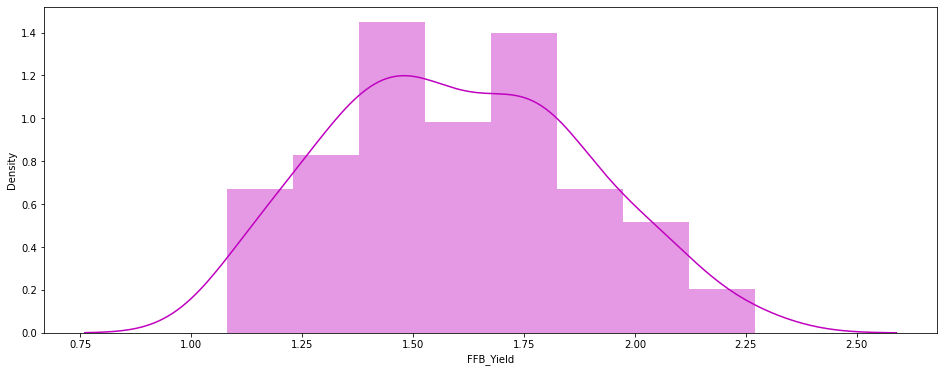

In [6]:
#Distribution of FFB variable 
plt.figure(figsize=(16, 6))
sns.distplot(palm['FFB_Yield'], color='m')

<AxesSubplot:xlabel='HA_Harvested', ylabel='FFB_Yield'>

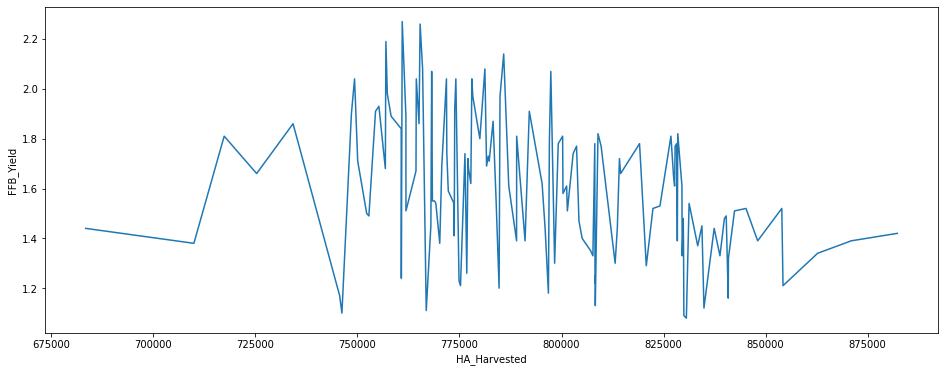

In [7]:
#Check relationship between HA_Harvested and FFB 
plt.figure(figsize=(16, 6))
sns.lineplot(x = 'HA_Harvested',
            y="FFB_Yield",
            data=palm)

In [8]:
#copy original data to new dataframe 
scale_df = palm.copy()
scale_df.head(4)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39


In [9]:
#Normalise data [0,1] to change the value into common scale without distorting differences in the ranges value 
cols_to_norm = ["SoilMoisture","Average_Temp","Min_Temp","Max_Temp","Precipitation","Working_days","HA_Harvested","FFB_Yield"]
scale_df = scale_df[cols_to_norm] = scale_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
scale_df.tail(4)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
126,0.427607,0.559955,0.621622,0.489796,0.309047,0.833333,1.000000,0.285714
127,0.367967,0.542986,0.405405,0.510204,0.253390,0.666667,0.734610,0.445378
128,0.376594,0.522687,0.567568,0.632653,0.361465,0.333333,0.546564,0.697479
129,0.487997,0.485483,0.567568,0.673469,0.414896,0.833333,0.444485,0.806723


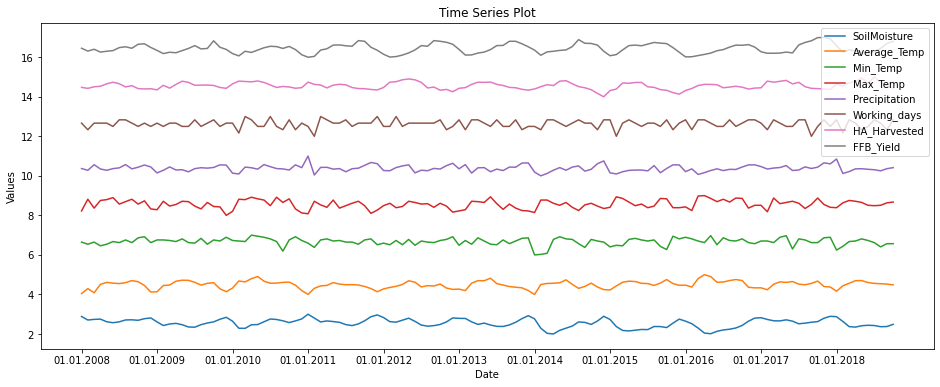

In [10]:
#Time-Series plot
plt.figure(figsize=(16,6))
name = scale_df.columns
x=2
for col in name: 
    plt.plot(palm["Date"], scale_df[col]+x)
    x += 2

plt.xticks(np.arange(0, len(scale_df)+1, 12))
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot')
plt.legend(name)
plt.show()



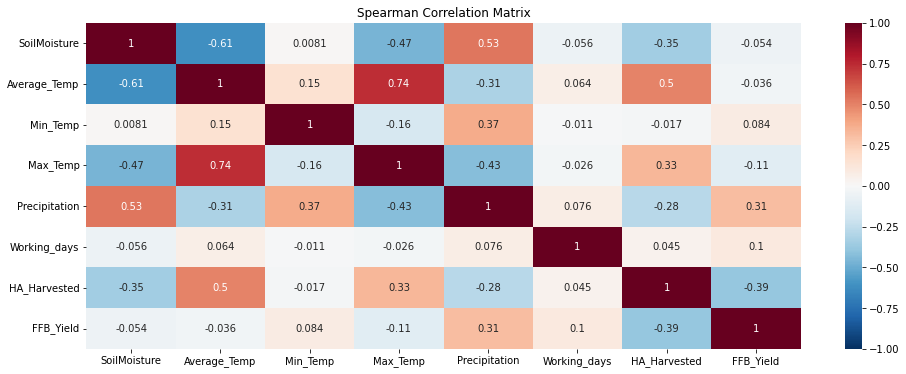

In [14]:
#correlatoin matrix 
plt.figure(figsize=(16,6))
corr_mat = palm.corr(method="spearman")
sns.heatmap(corr_mat, annot=True, cmap='RdBu_r', vmax=1, vmin=-1, center=0)
plt.title("Spearman Correlation Matrix")
plt.show()

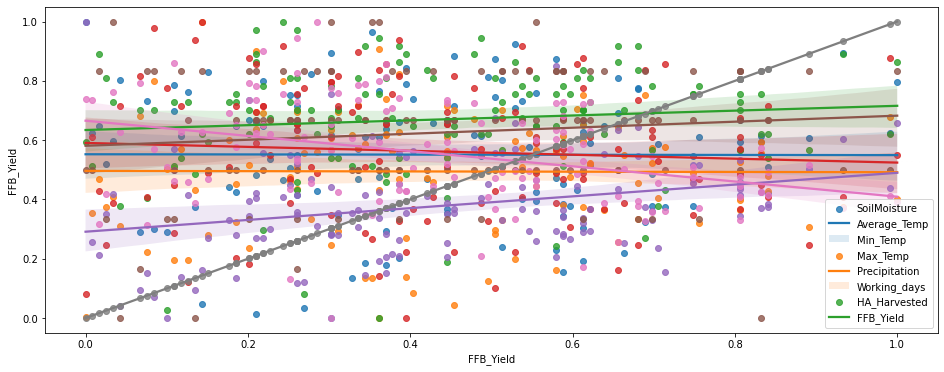

In [16]:
plt.figure(figsize=(16,6))
for col in name: 
    sns.regplot(scale_df["FFB_Yield"], scale_df[col])

plt.legend(name)
plt.show()

In [20]:
#drop HA_Harvested
data =  scale_df.drop(['HA_Harvested'], axis=1)
data.head(4)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,FFB_Yield
0,0.884096,0.043363,0.648649,0.224490,0.369156,0.666667,0.453782
1,0.705926,0.294410,0.540541,0.816327,0.279700,0.333333,0.310924
2,0.738560,0.084842,0.648649,0.367347,0.563449,0.666667,0.403361
3,0.751688,0.510024,0.459459,0.755102,0.346691,0.666667,0.260504


In [23]:
#extract dependent and independent variables 
X= data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [29]:
#Linear Regression model
regr = LinearRegression()
reg_fit = regr.fit(X, Y)
reg_fit.intercept_
reg_fit.coef_


array([-0.25661255,  0.00178472, -0.05645971,  0.00653401,  0.62765659,
        0.05866106])